<a href="https://colab.research.google.com/github/NickGrande95/Final-Project/blob/main/Final_Project_Nicko_Farhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MEMASUKKAN DATASET KE DALAM PYTHON

In [ ]:
df = pd.read_csv('/content/Amazon.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (100000, 20)

First few rows:


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


# MEMERIKSA KESESUAIAN TIPE DATA

In [ ]:
df.dtypes

,0
OrderID,object
OrderDate,object
CustomerID,object
CustomerName,object
ProductID,object
ProductName,object
Category,object
Brand,object
Quantity,int64
UnitPrice,float64


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [ ]:
df.dtypes

,0
OrderID,object
OrderDate,datetime64[ns]
CustomerID,object
CustomerName,object
ProductID,object
ProductName,object
Category,object
Brand,object
Quantity,int64
UnitPrice,float64


# MEMERIKSA JUMLAH DATA NULL

In [ ]:
df.isnull().sum()

,0
OrderID,0
OrderDate,0
CustomerID,0
CustomerName,0
ProductID,0
ProductName,0
Category,0
Brand,0
Quantity,0
UnitPrice,0


# MEMERIKSA JUMLAH DATA DUPLICATE

In [ ]:
df.duplicated().sum()

np.int64(0)

# MEMERIKSA JUMLAH DATA OUTLIERS

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

jumlah_outlier = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    bawah = Q1 - 1.5 * IQR
    atas = Q3 + 1.5 * IQR

    indikator = (df[col] < bawah) | (df[col] > atas)
    jumlah_outlier[col] = df[indikator].index.tolist()

for col, idx in jumlah_outlier.items():
    print(f"{col}: {len(idx)} outliers")

Quantity: 0 outliers
UnitPrice: 0 outliers
Discount: 1989 outliers
Tax: 5109 outliers
ShippingCost: 0 outliers
TotalAmount: 1360 outliers


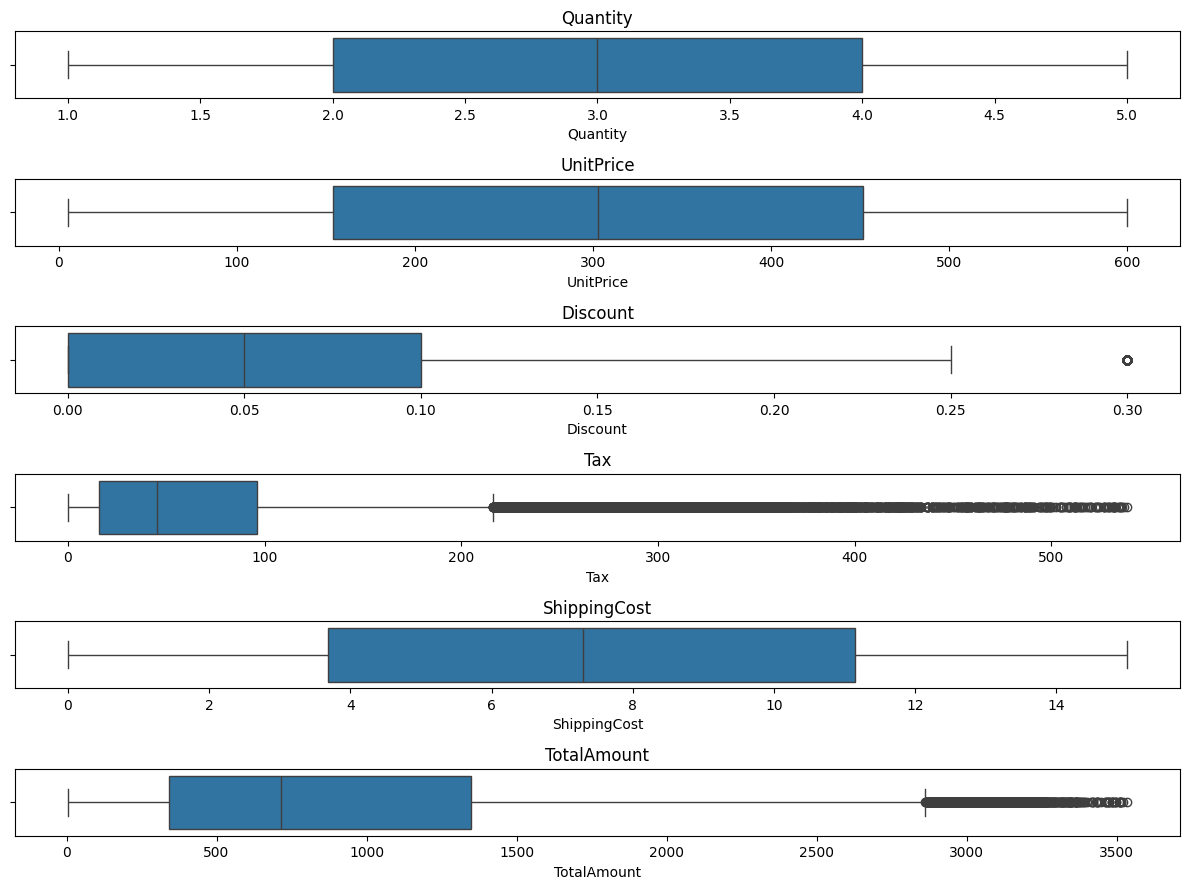

In [ ]:
plt.figure(figsize=(12, len(numeric_cols)*1.5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# MEMBUANG DATA OUTLIERS DARI DATASET

In [ ]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

df_clean = remove_outliers_iqr(df, numeric_cols)

# EXPORT DATA BERSIH KE EXCEL

In [ ]:
df_clean.to_excel('Amazon_data_clean.xlsx', index=False)